In [1]:
import lammps_logfile
import numpy as np

In [2]:
log = lammps_logfile.File("320_log.lammps")

In [3]:
time = log.get("Time") # femtoseconds
time = time/1000 # picoseconds
temp = log.get("Temp") # K
enthalpy = log.get("Enthalpy") # Kcal/mol
density = log.get("Density") # gram/cm^3
pressure = log.get("Press") #atm
vol = log.get("Volume") # angstrom^3
PE = log.get("PotEng") # kcal/mol
TE = log.get("TotEng") #kcal/mol

In [4]:
np.size(time[time<501.97])

251

In [5]:
time = time[251:]
temp = temp[251:]
enthalpy = enthalpy[251:]
density = density[251:]
pressure = pressure[251:]
vol = vol[251:]
PE = PE[251:]
TE = TE[251:]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

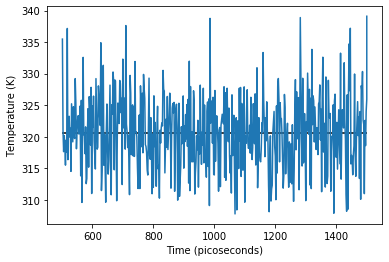

In [7]:
plt.plot(time, temp)
plt.hlines(np.mean(temp),np.min(time), np.max(time))
plt.ylabel('Temperature (K)')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()

In [8]:
np.mean(temp)

320.62731946107783

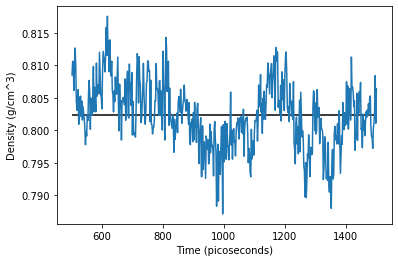

In [9]:
plt.plot(time, density)
plt.hlines(np.mean(density),np.min(time), np.max(time))
plt.ylabel('Density (g/cm^3)')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()

In [10]:
np.mean(density)

0.8023588321157684

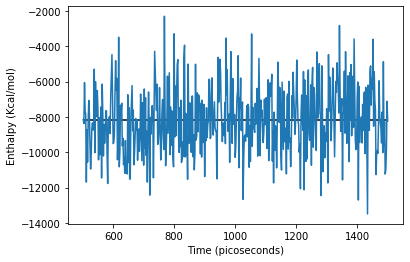

In [11]:
plt.plot(time, enthalpy)
plt.hlines(np.mean(enthalpy),np.min(time), np.max(time))
plt.ylabel('Enthalpy (Kcal/mol)')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()

In [12]:
np.mean(enthalpy)

-8148.238875648703

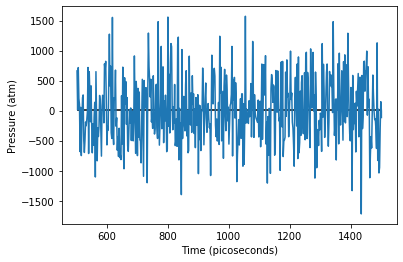

In [13]:
plt.plot(time, pressure)
plt.hlines(np.mean(pressure),np.min(time), np.max(time))
plt.ylabel('Pressure (atm)')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()

In [14]:
np.mean(pressure)

12.851152896207582

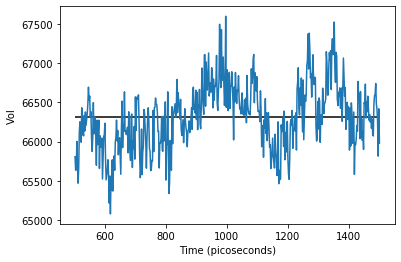

In [15]:
plt.plot(time, vol)
plt.hlines(np.mean(vol),np.min(time), np.max(time))
plt.ylabel('Vol')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()

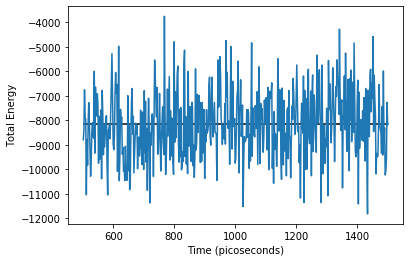

In [16]:
plt.plot(time, TE)
plt.hlines(np.mean(TE),np.min(time), np.max(time))
plt.ylabel('Total Energy')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()

In [17]:
np.mean(TE)

-8160.028939321356

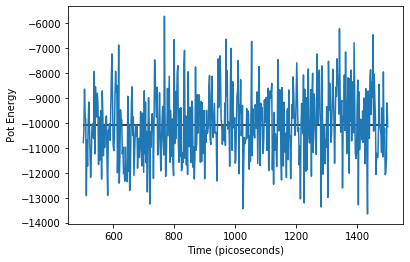

In [18]:
plt.plot(time, PE)
plt.hlines(np.mean(PE),np.min(time), np.max(time))
plt.ylabel(' Pot Energy')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()

In [19]:
np.mean(PE)

-10070.531488822357

In [20]:
vol_flucs = np.mean((vol-np.mean(vol)**2))

In [21]:
vol_flucs = abs(vol_flucs) # angstrom^6
vol_flucs

4397722767.472094

In [22]:
mean_vol = np.mean(vol)
mean_temp = np.mean(temp)

In [23]:
mean_vol # angstrom^3

66315.82830139721

In [24]:
k_b = 3.29982916e-27 # kcal/K
R = 8.20573660809596e-5 # m3⋅atm⋅K−1⋅mol−1
k = R/6.023e+23

In [25]:
k

1.3624002337864786e-28

In [26]:
isothermal_compressibility = vol_flucs * (1e-30)/(mean_vol * k * mean_temp)

In [27]:
isothermal_compressibility/1000

0.0015181176021572195

In [28]:
R = 1.9858775e-3 # kcal mol-1 K-1

In [29]:
enthalpy_est = np.mean(TE)/1000 + R * mean_temp

In [30]:
enthalpy_est

-7.523302359718289

In [31]:
mean_enthalphy = np.mean(enthalpy)

In [32]:
mean_enthalphy/1000

-8.148238875648703